**Part 1**
<br/>

Full Name : EL GHAZI LOUBNA

Make sur to install "
!pip3 install gensim

In [8]:
import re
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt



######################################################################################################
def clean_text(text):
    # les stops words 
    stop_words = ["bought", "I", "for", "and", "with", "a", "of", "each", "dollar"]
    # Remove 
    cleaned_text = re.sub(r'\b(?:{})\b'.format('|'.join(stop_words)), '', text, flags=re.IGNORECASE)
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    return cleaned_text
################################################
def generate_bill(text):
    cleaned_text = clean_text(text)
    #regex patterns
    price_pattern = r'(\d+(?:,\d+)?)'  
    quantity_pattern = r'\b(?:one|two|three|four|five|six|seven|eight|nine|ten)\b'  
    item_pattern = r'([\w\s]+\w)'  
    items = re.findall(item_pattern, cleaned_text)
    quantities = re.findall(quantity_pattern, cleaned_text)
    prices = re.findall(price_pattern, cleaned_text)

    print(quantities)
    print(prices)
    print(items)
    quantity_dict = {
        'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5,
        'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 'ten': 10
    }
    quantities_numeric = []
    for i in quantities:
        if i.isdigit():
            quantities_numeric.append(int(i))
        else:
            quantities_numeric.append(quantity_dict.get(i))

    #####################################################################
    bill_table = "Product Quantity Unit Price Total Price\n"
    for item, quantity, price in zip(items, quantities_numeric, prices):
        price = price.replace(',', '.')
        total_price = float(price) * quantity
        item = re.sub(quantity_pattern, '', item).strip()
        item = re.sub(price_pattern, '', item).strip()
        bill_table += f"{item} {quantity} {price} {total_price}\n"
    return bill_table

# OUTPUT :
user_text = "I bought three Samsung smartphones 150 $ each, four kilos of fresh banana for 1,2 dollar a kilogram and one Hamburger with 4,5 dollar"
generated_bill = generate_bill(user_text)
print("Generated Bill:\n", generated_bill)


['three', 'four', 'one']
['150', '1,2', '4,5']
['three Samsung smartphones 150', ' four kilos fresh banana 1', '2 kilogram one Hamburger 4']
Generated Bill:
 Product Quantity Unit Price Total Price
Samsung smartphones 3 150 450.0
kilos fresh banana 4 1.2 4.8
kilogram  Hamburger 1 4.5 4.5



**Part 2**

In [9]:
from pymongo import MongoClient
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Connection to MongoDB
client = MongoClient('mongodb://localhost:27017/')
db = client["arabic_news"]
collection = db["articles"]
data = [article['summary'] for article in collection.find()]

# one hot encoding
cv = CountVectorizer(binary=True)
one_hot_encoded = cv.fit_transform(data)

# bag of words
cv = CountVectorizer()
bag_of_words = cv.fit_transform(data)

# TF-IDF
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(data)

print("One Hot Encoded shape:", one_hot_encoded)
print("Bag of Words shape:", bag_of_words)
print("TF-IDF shape:", tfidf_matrix)


One Hot Encoded shape:   (0, 260)	1
  (0, 102)	1
  (0, 315)	1
  (0, 214)	1
  (0, 230)	1
  (0, 97)	1
  (0, 404)	1
  (0, 408)	1
  (0, 395)	1
  (0, 40)	1
  (0, 50)	1
  (0, 111)	1
  (0, 160)	1
  (0, 61)	1
  (0, 181)	1
  (0, 380)	1
  (0, 261)	1
  (0, 234)	1
  (0, 53)	1
  (0, 342)	1
  (0, 55)	1
  (1, 315)	1
  (1, 320)	1
  (1, 266)	1
  (1, 170)	1
  :	:
  (55, 42)	1
  (55, 321)	1
  (55, 368)	1
  (55, 393)	1
  (55, 122)	1
  (55, 131)	1
  (55, 364)	1
  (55, 413)	1
  (55, 115)	1
  (55, 378)	1
  (55, 382)	1
  (55, 74)	1
  (55, 180)	1
  (55, 161)	1
  (55, 252)	1
  (55, 164)	1
  (55, 123)	1
  (55, 228)	1
  (55, 223)	1
  (55, 293)	1
  (55, 247)	1
  (55, 31)	1
  (55, 372)	1
  (55, 390)	1
  (55, 12)	1
Bag of Words shape:   (0, 260)	1
  (0, 102)	1
  (0, 315)	2
  (0, 214)	1
  (0, 230)	1
  (0, 97)	1
  (0, 404)	1
  (0, 408)	1
  (0, 395)	1
  (0, 40)	1
  (0, 50)	1
  (0, 111)	1
  (0, 160)	1
  (0, 61)	1
  (0, 181)	1
  (0, 380)	1
  (0, 261)	1
  (0, 234)	1
  (0, 53)	1
  (0, 342)	1
  (0, 55)	1
  (1, 315)	1
  (1, 

In [4]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Tokenization
tokenized_data = [word_tokenize(article) for article in data]

#  Skip Gram
skipgram_model = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, sg=1)

# CBOW
cbow_model = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, sg=0)

word = 'إسرائيل'
print("Word Vector for '{}' (Skip Gram):\n".format(word), skipgram_model.wv[word])
print("Word Vector for '{}' (CBOW):\n".format(word), cbow_model.wv[word])



Word Vector for 'إسرائيل' (Skip Gram):
 [-5.0338274e-03 -6.0252822e-03 -8.2836095e-03  8.0543132e-03
 -1.7220206e-03 -8.3028162e-03 -3.2470950e-03  6.9889016e-03
 -3.9879773e-03 -4.9674101e-03  1.7098509e-03 -4.0540039e-03
 -6.0630700e-04  2.5053783e-03 -2.1744969e-03  8.0452114e-03
  5.6982962e-03 -1.0149879e-02  6.3151489e-03 -8.5430779e-03
  2.1186559e-03  3.6619343e-03 -3.0871886e-03 -3.4592575e-03
  7.5082709e-03 -4.8523322e-03 -8.8338098e-03  9.5492098e-03
 -2.5323625e-03 -5.3655785e-03  9.8042162e-03  4.1019404e-03
  5.4016015e-03  7.5559407e-03 -8.7457169e-03  5.9694997e-03
  2.1959275e-03  4.0904875e-03  2.3369398e-04  4.1097915e-03
  4.9144756e-03  6.1630979e-03 -2.8076239e-03 -4.9019749e-03
  1.9765022e-04  1.8944936e-03 -4.6914443e-03  5.5419686e-03
  4.1899625e-03  8.2082571e-03  3.1749001e-03  7.2645159e-03
 -2.2214022e-03  7.6034209e-03  4.4855596e-03 -8.1019448e-03
 -2.7349629e-03 -2.2742050e-03  4.3163756e-03 -1.1140949e-03
 -2.9371083e-03  6.2551345e-03  1.0248254e-02

In [15]:
#part3

In [10]:
from gensim.models import FastText

# Glove
glove_model = FastText(sentences=tokenized_data, vector_size=100, window=5, sg=1)

# FastText
fasttext_model = FastText(sentences=tokenized_data, vector_size=100, window=5, sg=0)

#############################3
print("Word Vector for '{}' (GloVe):\n".format(word), glove_model.wv[word])
print("Word Vector for '{}' (FastText):\n".format(word), fasttext_model.wv[word])


Word Vector for 'بما' (GloVe):
 [-3.24324472e-04 -3.35766259e-03 -1.58814376e-03 -2.49858946e-03
  5.24815288e-04 -2.22087721e-03 -6.22614985e-04 -3.41170933e-04
 -1.44470576e-03 -2.05056742e-03 -2.15409603e-03  2.54989282e-04
  1.48483645e-03  9.97233321e-04 -1.14278740e-03  2.08198722e-03
  1.24158431e-03 -1.92882799e-04  2.32121907e-04  1.82896946e-03
  1.72088083e-04  1.78177701e-03 -1.51970331e-03 -2.27227970e-03
 -1.89615169e-03  2.06375797e-03  1.33449712e-03  2.98141758e-03
  8.23161565e-04  1.55803177e-03  1.63208274e-03  2.05481588e-03
  4.39096679e-04 -1.66543806e-03 -4.65063524e-04  1.34683598e-03
 -7.02590449e-04  2.59129247e-05 -2.59206234e-03 -1.85551634e-03
  4.36674478e-03 -2.19713431e-03  2.41297088e-03 -1.72644548e-04
  7.59626040e-04 -2.21145921e-04  3.43423779e-03 -5.41597232e-03
 -9.83124366e-04  2.05193856e-03  1.85774860e-03  1.85318978e-03
 -3.73549829e-03  2.11702916e-03 -1.80028554e-03 -2.21580546e-03
 -2.16827425e-06  1.52592920e-03 -1.40154862e-03  1.879797

In [14]:
#part 4 

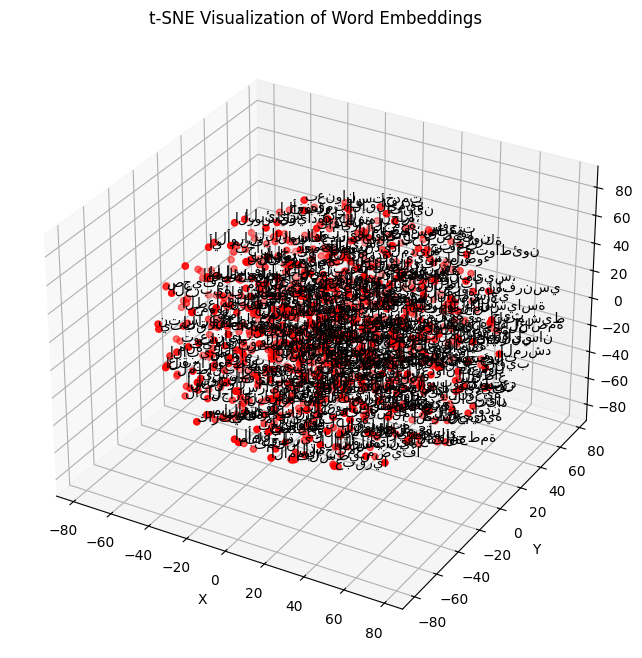

In [16]:
all_words = set()
for article in data:
    all_words.update(word_tokenize(article))

# Skip Gram
skipgram_vectors = []
for word in all_words:
    try:
        vector = skipgram_model.wv[word]
        skipgram_vectors.append(vector)
    except KeyError:
        pass
skipgram_vectors_array = np.array(skipgram_vectors).reshape(-1, 100)
#################################
# CBOW
cbow_vectors = []
for word in all_words:
    try:
        vector = cbow_model.wv[word]
        cbow_vectors.append(vector)
    except KeyError:
        pass
cbow_vectors_array = np.array(cbow_vectors).reshape(-1, 100)
#######################
# Glove
glove_vectors = []
for word in all_words:
    try:
        vector = glove_model.wv[word]
        glove_vectors.append(vector)
    except KeyError:
        pass
glove_vectors_array = np.array(glove_vectors).reshape(-1, 100)
# Apply FastText
fasttext_vectors = []
for word in all_words:
    try:
        vector = fasttext_model.wv[word]
        fasttext_vectors.append(vector)
    except KeyError:
        pass
fasttext_vectors_array = np.array(fasttext_vectors).reshape(-1, 100)
all_vectors_array = np.concatenate((skipgram_vectors_array, cbow_vectors_array, glove_vectors_array, fasttext_vectors_array))
tsne_3d = TSNE(n_components=3, random_state=42)
vectors_tsne_3d = tsne_3d.fit_transform(all_vectors_array)
###############################################
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(vectors_tsne_3d[:, 0], vectors_tsne_3d[:, 1], vectors_tsne_3d[:, 2],color='red')
for i, word in enumerate(all_words):
    ax.text(vectors_tsne_3d[i, 0], vectors_tsne_3d[i, 1], vectors_tsne_3d[i, 2], word, color='black')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('t-SNE Visualization of Word Embeddings ')
plt.show()
